In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/"

In [3]:
# Phenotype (genes X cells)
phenotype_file = input_files_dir+"phenotype.csv.pkl"
phenotype = pd.read_pickle(phenotype_file)
phenotype.head()

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103,21843_1#105,21843_1#106,21843_1#107,21843_1#108,21843_1#109,...,24539_8#88,24539_8#89,24539_8#90,24539_8#91,24539_8#92,24539_8#93,24539_8#94,24539_8#95,24539_8#97,24539_8#98
ENSG00000000003_TSPAN6,5.520777,6.456208,5.878671,4.860824,5.903640,4.513537,6.401983,5.909216,5.366645,3.228852,...,5.841814,6.104105,6.275649,7.029407,5.806978,6.199875,7.014180,6.228476,6.217161,6.034232
ENSG00000000419_DPM1,5.392461,6.065923,6.838769,6.614268,6.512403,5.527439,6.525591,6.381135,6.157296,6.248478,...,6.543807,6.369119,7.185421,6.337047,6.162437,5.885993,7.431358,7.013124,4.851771,4.937248
ENSG00000000457_SCYL3,0.000174,0.352597,0.000000,0.825955,2.201697,0.262446,0.000000,1.506837,0.283516,3.241977,...,0.017386,0.949668,0.035526,0.032044,1.773369,0.000000,0.108025,1.756339,2.492943,1.363441
ENSG00000000460_C1orf112,1.471928,4.536968,4.318528,5.373009,4.636175,4.225468,0.409785,3.668277,3.057933,3.154891,...,4.720967,3.791536,2.696476,4.227515,4.243689,3.227508,2.621121,3.950978,3.926914,4.211904
ENSG00000001036_FUCA2,2.908802,3.867327,3.321747,3.736476,4.917576,2.456866,0.577839,4.777404,2.873857,2.536708,...,3.070608,4.491643,4.206249,3.695005,2.652845,4.221847,3.188030,4.741496,3.872743,4.374577


In [9]:
sum((phenotype == 0).astype(int).sum(axis=1)/phenotype.shape[1]>0.2)

5239

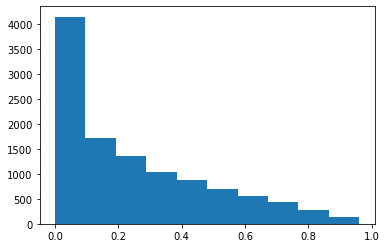

In [14]:
plt.hist((phenotype == 0).astype(int).sum(axis=1)/phenotype.shape[1])
plt.show()

In [19]:
5239/11231

0.46647671623185827

In [10]:
# Filter on specific gene-SNP pairs
# eQTL from endodiff (ips+mesendo+defendo)
endo_eqtl_file = input_files_dir+"endodiff_eqtl_allconditions_FDR10pct.csv"
endo_eqtl = pd.read_csv(endo_eqtl_file, index_col = False)
endo_eqtl.head()

,snp_id,feature,stage
0,5_149826526_C_T,ENSG00000164587_RPS14,ips
1,11_57283988_C_T,ENSG00000134809_TIMM10,ips
2,12_56401085_G_A,ENSG00000197728_RPS26,ips
3,17_79634162_T_G,ENSG00000214087_ARL16,ips
4,6_31486901_T_C,ENSG00000198563_DDX39B,ips


In [11]:
genes = endo_eqtl['feature'].unique()
len(genes)

array(['ENSG00000164587_RPS14', 'ENSG00000134809_TIMM10',
       'ENSG00000197728_RPS26', ..., 'ENSG00000132130_LHX1',
       'ENSG00000112559_MDFI', 'ENSG00000141012_GALNS'], dtype=object)

In [15]:
pheno = phenotype.loc[genes]
pheno.shape

(3240, 34256)

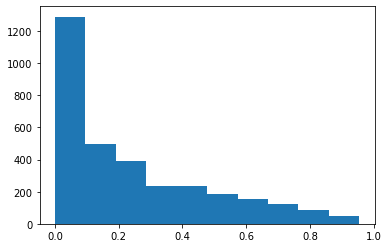

In [17]:
plt.hist((pheno == 0).astype(int).sum(axis=1)/pheno.shape[1])
plt.show()

In [16]:
sum((pheno == 0).astype(int).sum(axis=1)/pheno.shape[1]>0.2)

1414

In [18]:
1414/3240

0.4364197530864197

In [20]:
sum((pheno == 0).astype(int).sum(axis=1)/pheno.shape[1]>0.3)

1016

In [21]:
1016/3240

0.3135802469135803